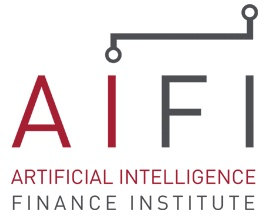


# Bootcamp - Python and Coding - Primer

## Functions and Object Oriented Programming

# About this Notebook

This is a short overview how to define and use functions and classes and object oriented programming in Python. Here is the link to the documentation for [classes](https://docs.python.org/3/tutorial/classes.html) and some more information how to define [functions](https://sites.pitt.edu/~naraehan/python3/user_defined_functions.html) in Python.

# Imports

In [1]:
import numpy as np  
import pandas as pd
import unittest
import abc # abstract base class in python, more info under: https://docs.python.org/3/library/abc.html 
from abc import ABC, abstractmethod

### Functions

In [2]:
def average_weights(w1,w2,w3):
    return (w1+w2+w3)/3

print(average_weights(0.34, 0.12, 0.44))

0.3


### args/kwargs

In [3]:
def average_weights_flex(*args):
    tot_weights = 0
    for n in args:
        tot_weights +=1
    return sum(args)/tot_weights

print(average_weights_flex(0.34, 0.12, 0.44))

0.3


In [4]:
# *args -> non keyword arguments e.g. my_func('Welcome', 'to', 'the', 'AIFI Bootcamp')
# **kwargs -> keyword arguments e. g. my_func(first='Welcome', mid='to the', last='AIFI Bootcamp')
# we use *args and **kwargs as an argument when we are unsure about 
# the number of arguments to pass in the functions.
def what_are_kwargs(*args, **kwargs):
    print('args: ', args)
    print('kwargs: ', kwargs)
what_are_kwargs(10,20,30)

args:  (10, 20, 30)
kwargs:  {}


In [5]:
what_are_kwargs(10,20,30, model='Kmeans', library='sklearn' )

args:  (10, 20, 30)
kwargs:  {'model': 'Kmeans', 'library': 'sklearn'}


### Umpacking params

In [6]:
params = {'w1': 0.34,
          'w2': 0.12,
          'w3': 0.44
          }

# umpack dict to use as parameters for functions
print(average_weights(**params))

0.3


---

## OOP

### Classes

In [7]:
class FinancialInstrument(object):  
    def __init__(self, name, type_):  
        self.name = name  
        self.type_ = type_  
        self.return_ = 0  
    def rets(self, r):  
        self.return_ += r 

In [8]:
my_stock = FinancialInstrument('Tesla', 'Stock')  

In [9]:
print(my_stock.name)  
print(my_stock.return_)

Tesla
0


In [10]:
my_stock.rets(8) 
my_stock.return_

8

## Basics of Python Classes

In [11]:
class Stock(object):  
    pass  

In [12]:
stock = Stock()  

In [13]:
type(stock)  

__main__.Stock

In [14]:
stock  

In [15]:
stock.price = 100  

In [16]:
stock.price  

100

In [17]:
class Stock(object):
    source = 'Quandl'  
    def __init__(self, symbol, price):  
        self.symbol = symbol  
        self.price = price  

In [18]:
Stock.source  

'Quandl'

In [19]:
amzn = Stock('AMNZ', 100)  

In [20]:
amzn.symbol  

'AMNZ'

In [21]:
amzn.source  

'Quandl'

In [22]:
amzn.price = 105  

In [23]:
amzn.price  

105

In [24]:
class Stock(Stock):  
    def get_price(self):  
        return self.price  
    def set_price(self, price):  
        self.price = price  

In [25]:
stock = Stock('AMZN', 100)  

In [26]:
stock.get_price()  

100

In [27]:
stock.set_price(105)  

In [28]:
stock.get_price()  

105

In [29]:
stock.price  

105

In [30]:
class Stock(object):
    def __init__(self, symbol, price):
        self.symbol = symbol  
        self.__price = price  
    def get_price(self):
        return self.__price
    def set_price(self, price):
        self.__price = price

In [31]:
stock = Stock('AMZN', 100)

In [32]:
stock.get_price()  

100

In [33]:
stock.set_price(100)  

In [34]:
class Portfolio(object):
    def __init__(self, stock, position_size):
        self.position = stock  
        self.__position_size = position_size  
    def get_position_size(self):
        return self.__position_size
    def update_position_size(self, position_size):
        self.__position_size = position_size
    def get_position_value(self):
        return self.__position_size * \
               self.position.get_price()  

In [35]:
portfolio = Portfolio(stock, 10)
print(portfolio.get_position_size())

10


In [36]:
print('Position value: ',portfolio.get_position_value())  
print('Position price:',portfolio.position.get_price()  )

Position value:  1000
Position price: 100


In [37]:
portfolio.position.set_price(105)  
print('New value after updating the price: ',portfolio.get_position_value() )

New value after updating the price:  1050


## Abstract classes

In this example, the RegressionModel class is an `abstract class` that defines the `basic methods` that a regression model should have, such as `fit` and `predict`. The `LinearRegression` and `LogisticRegression` classes inherit from the `RegressionModel` class and provide their __own implementation__ for the `fit` and `predict` methods. By defining the abstract class and its methods, we can ensure that __all regression models__ in our code have the same basic structure and functionality, making it easier to work with __multiple regression models__ in a consistent way.


An abstract class in Python is a class that defines a common interface or abstract methods that its subclasses must implement. It is a blueprint for creating objects, but it cannot be instantiated on its own.
There are several benefits to using an abstract class in Python:

1. Encapsulation: An abstract class can define common methods and attributes that are shared by its subclasses, thereby encapsulating common behavior and data.

2. Reusability: An abstract class provides a common interface for its subclasses, allowing developers to reuse code and create new objects that follow the same interface.

3. Polymorphism: An abstract class and its subclasses can be used interchangeably, allowing developers to write generic and flexible code that can handle objects of different types.

4. Code Organization: An abstract class provides a clear structure for organizing related classes, and it makes it easy to see the relationship between classes and understand their purpose.

5. Improved Readability: An abstract class makes it easier to understand the structure of a codebase, which can lead to improved code quality and maintainability.

In conclusion, the use of abstract classes in Python provides a way to define common interfaces, encapsulate behavior and data, improve code organization, and improve code readability. These benefits make abstract classes a valuable tool for creating maintainable, reusable, and scalable code.

In [38]:
class RegressionModel(metaclass=abc.ABCMeta):
    @abc.abstractmethod
    def fit(self, X, y):
        pass
    
    @abc.abstractmethod
    def predict(self, X):
        pass

class LinearRegression(RegressionModel):
    def fit(self, X, y):
        # implementation of linear regression fitting algorithm
        pass
    
    def predict(self, X):
        # implementation of linear regression prediction algorithm
        pass

class LogisticRegression(RegressionModel):
    def fit(self, X, y):
        # implementation of logistic regression fitting algorithm
        pass
    
    def predict(self, X):
        # implementation of logistic regression prediction algorithm
        pass


## Interfaces

To create an interface, we need to define an abstract base class with abstract methods.
The following interface defines the methods that a financial model must implement. Any concrete implementation of this interface, such as a linear regression model or a neural network model, must provide an implementation of these methods. This way, we can ensure that all financial models have a consistent interface, making it easier to use and compare different models.

In [39]:
class FinancialModel(ABC):
    @abstractmethod
    def fit(self, data):
        pass

    @abstractmethod
    def predict(self, data):
        pass

    @abstractmethod
    def evaluate(self, data):
        pass


## Unit tests

The following is just a very simple example of a `unittest TestCase`, here is a [link](https://docs.python.org/3/library/unittest.html) to the documention how to create `unittest` in Python. 

In [40]:
class TestPortfolio(unittest.TestCase):
    def test_get_position_size(self):
        stock = Stock("AAPL", 100)
        portfolio = Portfolio(stock, 10)
        self.assertEqual(portfolio.get_position_size(), 10)
    
    def test_update_position_size(self):
        stock = Stock("AAPL", 100)
        portfolio = Portfolio(stock, 10)
        portfolio.update_position_size(20)
        self.assertEqual(portfolio.get_position_size(), 20)
        
    def test_get_position_value(self):
        stock = Stock("AAPL", 100)
        portfolio = Portfolio(stock, 10)
        self.assertEqual(portfolio.get_position_value(), 1000)


# this doesn't work in jupyter noteboosk ==> unittest.main() ==> use this syntax outside jupyter notebook
        
unittest.main(argv=['first-arg-is-ignored'], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Design Patterns

Software design patterns provide a way to structure and organize code, making it more readable, maintainable, and reusable. This can lead to a more efficient and scalable solution for financial models, as well as making it easier to test and debug code. In addition, design patterns help ensure that code meets best practices and industry standards, which can enhance the reliability and performance of financial models.

Furthermore, a solid understanding of software design patterns can also help to communicate and collaborate more effectively with software engineers and developers. This can lead to more efficient and effective solutions for financial models, as well as help build better relationships between different teams within a financial institution.


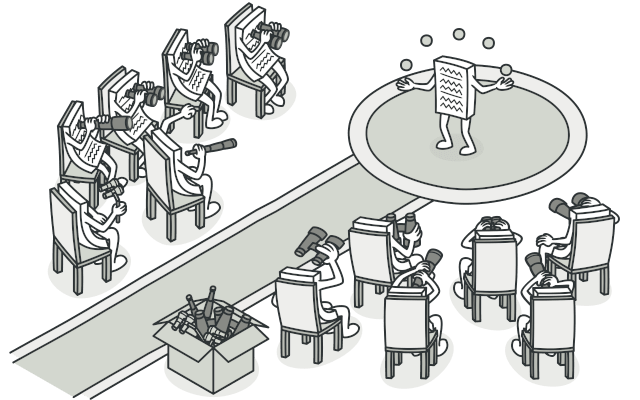

Link with information about design patterns in Python: https://refactoring.guru/design-patterns/python